# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import pandas as pd

# Augmented Data is stored here
# https://s3-us-west-1.amazonaws.com/traffic-sign-augmented-data/augmented.p

# TODO: Fill this in based on where you saved the training and testing data
use_augmented = True

if use_augmented:
    training_file = 'augmented/augmented.p'
else:
    training_file = 'data/train.p'

validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, Y_train = train['features'], train['labels']
# X_valid, Y_valid = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']

from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

print("Updated Image Shape: {}".format(X_train[0].shape))

frame = pd.read_csv('signnames.csv')

def get_signname(label_id):
    return frame["SignName"][label_id]

Updated Image Shape: (32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = train['labels'].shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 172860
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 172860


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.offsetbox import AnchoredText
from matplotlib.patheffects import withStroke
# Visualizations will be shown in the notebook.
%matplotlib inline
matplotlib.style.use('ggplot')

(172860, 32, 32, 3) (172860,)


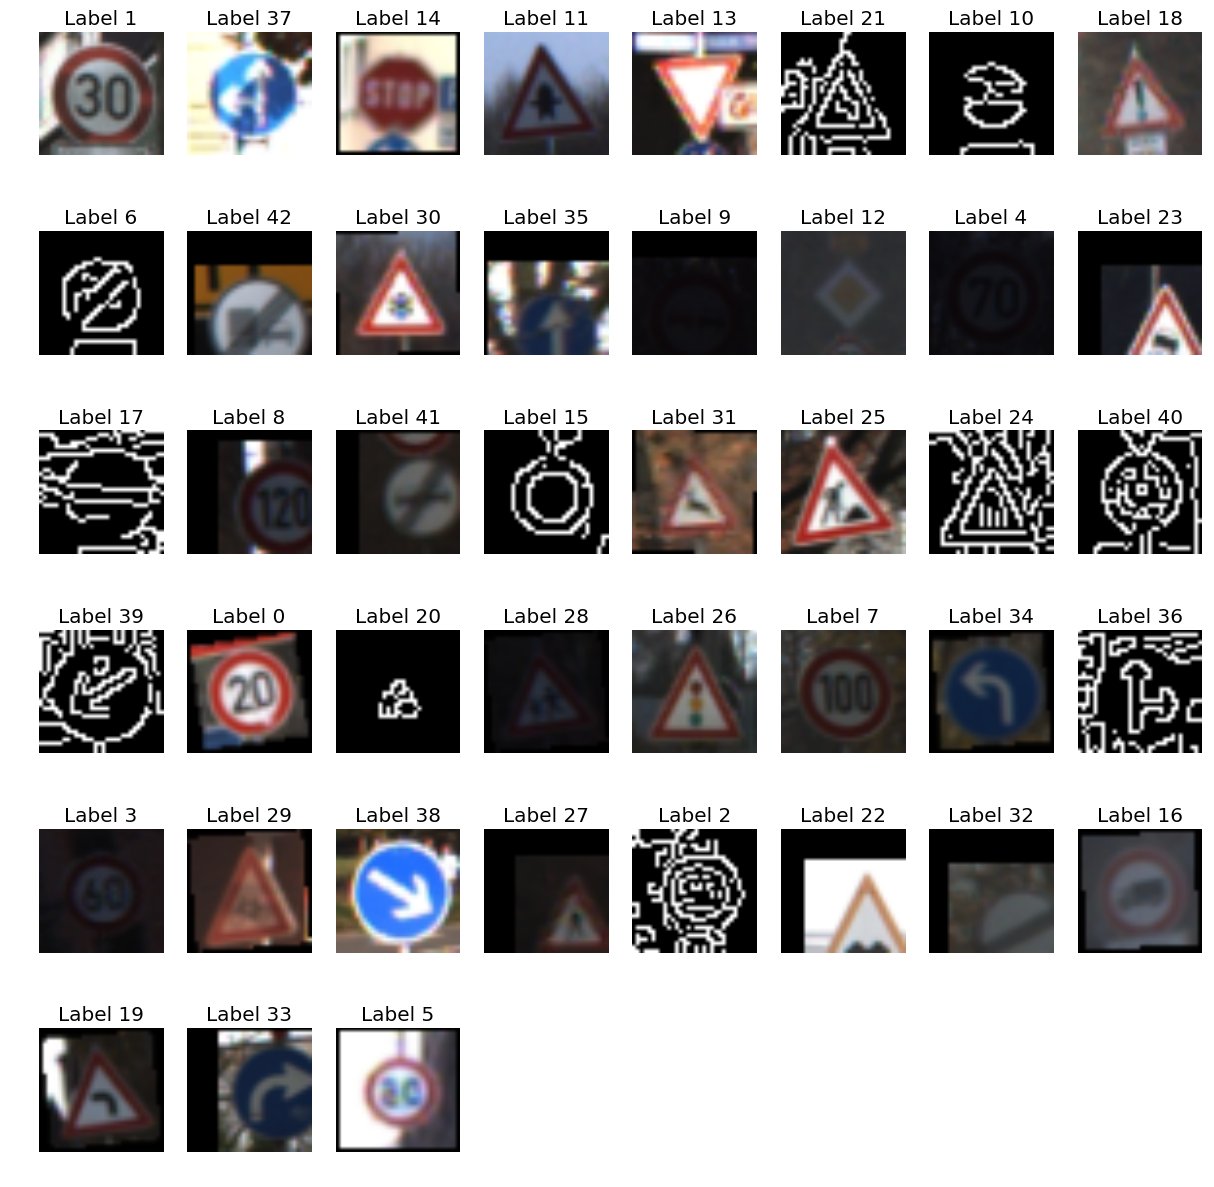

In [6]:
# Show a single image of each type of label
print(train['features'].shape, train['labels'].shape)
image_with_label = zip(train['features'], train['labels'])
seen_labels = set()

fig = plt.figure(figsize=(200, 200))
total_unique_labels = len(set(train['labels']))
unique_rows = total_unique_labels // 8 + 1

def draw_image(grid_cell, img, txt):
    im = grid[i].imshow(img)
    size = dict(size="xx-large")
    at = AnchtoredText(signname, loc=3, prop=size,
                  pad=0., borderpad=0.5,
                  frameon=False)
    grid_cell.add_artist(at)
    at.txt._text.set_path_effects([withStroke(foreground="w", linewidth=3)])

i = 1
plt.figure(figsize=(15, 15))
for i_l in image_with_label:
    img, label = i_l
    if label not in seen_labels:
        signname = get_signname(label)
        plt.subplot(unique_rows, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0}".format(label))
        plt.imshow(img)
        seen_labels.add(label)
        i += 1

plt.show()

In [7]:
# Draw a histogram of how many features we have per label
bincounts = np.bincount(train['labels'])
bincounts = bincounts[train['labels']]
fig, ax = plt.subplots()
ax.bar(train['labels'], bincounts)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/backend_bases.py", line 2232, in print_figure
    **kwargs)
  File "/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/backends/backend_agg.py", line 527, in print_png
    FigureCanvasAgg.draw(self)
  File "/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/backends/backend_agg.py", line 474, in draw
    self.figure.draw(self.renderer)
  File "/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/artist.py", line 62, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py", line 1159, in draw
    func(*args)
  File "/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/artist.py", line 62, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 2319, in dr

TypeError: Can't convert 'list' object to str implicitly

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [1]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np

import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten

import pickle

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform

import argparse

import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt

from scipy import ndimage

import multiprocessing

matplotlib.style.use('ggplot')

# Helper Functions

In [2]:
def print_header(txt):
    print("-" * 100)
    print(txt)
    print("-" * 100)


def print_progress_bar(iteration, total, prefix='', suffix='', decimals=1, bar_length=100):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        bar_length  - Optional  : character length of bar (Int)
    """
    str_format = "{0:." + str(decimals) + "f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(bar_length * iteration / float(total)))
    bar = '█' * filled_length + '-' * (bar_length - filled_length)

    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

# Tensorflow Helper Functions

# Helper Classes

## Image Class

In [3]:
class Image:
    @staticmethod
    def rotate_image(img, label):
        # Rotate the image by a random angle (-45 to 45 degrees)
        # Rotation has to be done within a very narrow range since it could
        # affect the meaning of the sign itself.
        # Choosing -10 to 10 degrees
        angle = np.random.choice(np.random.uniform(-10,10,100))
        dst = ndimage.rotate(img, angle)
        height, width = img.shape[:2]
        dst = cv2.resize(dst, (width, height))
        return dst

    @staticmethod
    def translate_image(img, label):
        tx = np.random.choice(np.arange(10))
        ty = np.random.choice(np.arange(10))
        M = np.float32([[1, 0, tx], [0, 1, ty]])
        rows, cols, _ = img.shape
        dst = cv2.warpAffine(img, M, (cols, rows))
        return dst

    @staticmethod
    def flip_image(img, label):
        can_flip_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
        # Classes of signs that, when flipped vertically, should still be classified as the same class
        can_flip_vertically = np.array([1, 5, 12, 15, 17])
        # Classes of signs that, when flipped horizontally and then vertically,
        #  should still be classified as the same class
        can_flip_both = np.array([32, 40])

        flipped = None

        if label in can_flip_horizontally:
            flipped = cv2.flip(img, 1)
        elif label in can_flip_vertically:
            flipped = cv2.flip(img, 0)
        elif label in can_flip_both:
            flipped = cv2.flip(img, np.random.choice([-1, 0, 1]))

        return flipped

    @staticmethod
    def edge_detected(img, label):
        slice = np.uint8(img)
        canny = cv2.Canny(slice, 50, 150)
        backtorgb = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
        return backtorgb

    @staticmethod
    def perform_random_op(img, label):
        ops = [Image.edge_detected, Image.flip_image,
               Image.translate_image, Image.rotate_image,
              ]

        random_op = ops[random.randint(0, len(ops) - 1)]
        print(str(random_op))
        new_img = random_op(img, label)
        while new_img is None:
            random_op = ops[random.randint(0, len(ops) - 1)]
            new_img = random_op(img, label)

        return new_img

    @staticmethod
    def insert_subimage(image, sub_image, y, x):
        h, w, c = sub_image.shape
        image[y:y+h, x:x+w, :]=sub_image
        return image

    @staticmethod
    def grayscale(image):
        # use lumnosity to convert to grayscale as done by GIMP software
        # refer https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
        image = image[:,:,0] * .21 + image[:,:,1] * .72 + image[:,:,2]* .07
        return image

    @staticmethod
    def normalize(data):
        return data / 255 * 0.8 + 0.1

    # iterate through the image set and convert them to grayscale images
    @staticmethod
    def preprocess(data):
        gray_images = []
        for image in data:
            gray = Image.grayscale(image)
            gray = np.reshape(gray,(32 , 32, 1))
            gray_images.append(gray)

        gray_images = np.array(gray_images)
        gray_images = Image.normalize(gray_images)

        return gray_images


## Data Class

In [4]:
class Data:
    """
    Encode the different data so its easier to pass them around
    """
    def __init__(self, X_train, y_train, X_validation, y_validation, X_test,
                 y_test, images_from_internet, filenames_from_internet):
        self.X_train = X_train
        self.y_train = y_train
        self.X_validation = X_validation
        self.y_validation = y_validation
        self.X_test = X_test
        self.y_test = y_test
        self.images_from_internet = images_from_internet
        self.filenames_from_internet = filenames_from_internet

        self.frame = pd.read_csv('signnames.csv')


    def normalize_data(self):
        # Normalize the RGB values to 0.0 to 1.0
        self.X_train = self.X_train / 255.0
        self.X_validation = self.X_validation / 255.0
        self.X_test = self.X_test / 255.0

    def get_signname(self, label_id):
        return self.frame["SignName"][label_id]

    def display_statistics(self):
        """
        Figure out statistics on the data using Pandas.
        """
        _, height, width, channel = self.X_train.shape
        num_class = np.max(self.y_train) + 1

        training_data = np.concatenate((self.X_train, self.X_validation))
        training_labels = np.concatenate((self.y_train, self.y_validation))

        num_sample = 10
        results_image = 255.*np.ones(shape=(num_class*height, (num_sample + 2 + 22) * width, channel), dtype=np.float32)
        for c in range(num_class):
            indices = np.array(np.where(training_labels == c))[0]
            random_idx = np.random.choice(indices)
            label_image = training_data[random_idx]
            Image.insert_subimage(results_image, label_image, c * height, 0)

            #make mean
            idx = list(np.where(training_labels == c)[0])
            mean_image = np.average(training_data[idx], axis=0)
            Image.insert_subimage(results_image, mean_image, c * height, width)

            #make random sample
            for n in range(num_sample):
                sample_image = training_data[np.random.choice(idx)]
                Image.insert_subimage(results_image, sample_image, c*height, (2 + n) * width)

            #print summary
            count=len(idx)
            percentage = float(count)/float(len(training_data))
            cv2.putText(results_image, '%02d:%-6s'%(c, self.get_signname(c)), ((2+num_sample)*width, int((c+0.7)*height)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
            cv2.putText(results_image, '[%4d]'%(count), ((2+num_sample+14)*width, int((c+0.7)*height)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0, 0, 255), 1)
            cv2.rectangle(results_image,((2+num_sample+16)*width, c*height),((2+num_sample+16)*width + round(percentage * 3000), (c+1)*height),(0, 0, 255), -1)


        cv2.imwrite('augmented/data_summary.jpg',cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))

    def visualize_training_data(self):
        _, height, width, channel = self.X_train.shape
        num_class = np.max(self.y_train) + 1

        training_data = np.concatenate((self.X_train, self.X_validation))
        training_labels = np.concatenate((self.y_train, self.y_validation))

        for c in range(0, num_class):
            print("Class %s" % c)
            indices = np.array(np.where(training_labels == c))[0]
            total_cols = 50
            total_rows = len(indices) / total_cols + 1

            results_image = 255. * np.ones(shape=(total_rows * height, total_cols * width, channel),
                                           dtype=np.float32)
            for n in range(len(indices)):
                sample_image = training_data[indices[n]]
                Image.insert_subimage(results_image, sample_image, (n / total_cols) * height, (n % total_cols) * width)

            filename = str(c) + ".png"
            cv2.imwrite('augmented/' + filename, cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))
            print("Wrote image: %s" % filename)

    def _augment_data_for_class(self, label_id, augmented_size, training_labels, training_data):
        """
        Internal method which will augment the data size for the specified label.
        It will calculate the initial size and augment it to its size.
        """
        print("\nAugmenting class: %s" % label_id)

        # find all the indices for the label id
        indices = np.array(np.where(training_labels == label_id))[0]
        total_data_len = len(indices)

        if indices.shape == 0:
            return np.array([]), np.array([])

        print("Label %s has %s images. Augmenting by %s images to %s images" % (label_id, total_data_len, (augmented_size - total_data_len), augmented_size))

        new_training_data = []
        new_training_label = []
        # Find a random ID from the indices and perform a random operation
        for i in range(0, (augmented_size - total_data_len)):
            print_progress_bar(i, (augmented_size - total_data_len), prefix='Progress:', suffix='Complete', bar_length=50)
            random_idx = np.random.choice(indices)
            img = training_data[random_idx]
            nimg = Image.perform_random_op(img=img, label=random_idx)

            # Add this to the training dataset
            new_training_data.append(nimg)
            new_training_label.append(label_id)

        new_training_data = np.array(new_training_data)
        new_training_label = np.array(new_training_label)

        return new_training_data, new_training_label

    def augment_data(self, augmentation_factor):
        """
        Augment the input data with more data so that we can make all the labels
        uniform
        """
        # Find the class label which has the highest images. We will decide the
        # augmentation size based on that multipled by the augmentation factor
        pool = multiprocessing.Pool(multiprocessing.cpu_count())

        training_labels = np.concatenate((self.y_train, self.y_validation))
        training_data   = np.concatenate((self.X_train, self.X_validation))

        bincounts = np.bincount(training_labels)
        label_counts = bincounts.shape[0]

        max_label_count = np.max(bincounts)
        augmentation_data_size = max_label_count * augmentation_factor

        print_header("Summary for Training Data for Augmentation")
        print("Max Label Count: %s" % max_label_count)
        print("Augmented Data Size: %s" % augmentation_data_size)

        args = []
        for i in range(0, label_counts):
            if i in training_labels:
                args.append((i, augmentation_data_size, training_labels, training_data))

        results = pool.starmap(self._augment_data_for_class, args)
        pool.close()
        pool.join()

        features, labels = zip(*results)

        features = np.array(features)
        labels = np.array(labels)

        augmented_features = np.concatenate(features, axis=0)
        augmented_labels = np.concatenate(labels, axis=0)
        all_features = np.concatenate(np.array([training_data, augmented_features]), axis=0)
        all_labels = np.concatenate(np.array([training_labels, augmented_labels]), axis=0)

        all_features, all_labels = shuffle(all_features, all_labels)

        train = {}
        train['features'] = all_features
        train['labels'] = all_labels

        f = open('augmented/augmented.p', 'wb')
        pickle.dump(train, f, protocol=4)

# Config Class

In [5]:
class NNConfig:
    """
    This class keeps all the configuration for running this network together at
    one spot so its easier to run it.
    """
    def __init__(self, EPOCHS, BATCH_SIZE, MAX_LABEL_SIZE, INPUT_LAYER_SHAPE,
                 LEARNING_RATE, SAVE_MODEL, NN_NAME, USE_AUGMENTED_FILE):
        """
        EPOCHS: How many times are we running this network
        BATCH_SIZE: How many inputs do we consider while running this data
        MAX_LABEL_SIZE: What is the maximum label size
                        (For example we have 10 classes for MNIST so its 10
                        For Traffic Database its 43)
        INPUT_LAYER_SHAPE: What is the shape of the input image.
                           How many channels does it have.
                           Eg. MNIST: 28x28x1
                           Traffic Sign: 32x32x3
        LEARNING_RATE: Learning rate for the network
        """
        self.EPOCHS = EPOCHS
        self.BATCH_SIZE = BATCH_SIZE
        self.MAX_LABELS = MAX_LABEL_SIZE
        self.INPUT_LAYER_SHAPE = INPUT_LAYER_SHAPE
        self.LEARNING_RATE = LEARNING_RATE
        self.SAVE_MODEL = SAVE_MODEL
        self.NN_NAME = NN_NAME
        self.IS_TRAINING = False
        self.USE_AUGMENTED_FILE = USE_AUGMENTED_FILE
        self.NETWORK_PARAMS = {}

        assert(len(INPUT_LAYER_SHAPE) == 3)

        self.NUM_CHANNELS_IN_IMAGE = INPUT_LAYER_SHAPE[2]

# Tensor Ops Class

In [6]:
class TensorOps:
    """
    This class stores the tensor ops which are the end layers which we use for
    training.
    """
    def __init__(self, x, y, dropout_keep_prob, phase, training_op, accuracy_op, loss_op, logits, saver):
        """
        x: Tensor for the input class
        y: Tensor for the output class
        training_op: Training operation Tensor
        accuracy_op: Tensor for the accuracy operation
        saver: Used for saving the eventual model
        """
        self.x = x
        self.y = y
        self.dropout_keep_prob = dropout_keep_prob
        self.phase = phase  # Training or Testing phase
        self.training_op = training_op
        self.accuracy_op = accuracy_op
        self.loss_op = loss_op
        self.logits = logits
        self.saver = saver

# Model Architecture

## Tensorflow Helper Functions

In [20]:
def convolutional_layer(input, num_input_filters, num_output_filters, filter_shape,
                        strides, padding, mean, stddev, phase, activation_func=None, name=""):
    conv_W = tf.Variable(tf.truncated_normal(shape=filter_shape+(num_input_filters, num_output_filters), mean=mean, stddev=stddev), name+"_weights")
    conv_b = tf.Variable(tf.zeros(num_output_filters), name=name+"_bias")

    conv = tf.nn.conv2d(input, conv_W, strides, padding) + conv_b

    conv = tf.contrib.layers.batch_norm(conv,
                                      center=True, scale=True,
                                      is_training=phase)
    # Activation Layer
    if activation_func is not None:
        conv = activation_func(conv)

    print(name + ": " + str(conv.get_shape().as_list()))
    return conv, num_output_filters


def fully_connected_layer(input, input_size, output_size, mean, stddev,
                          activation_func, dropout_prob, phase, name, logits=False):
    fc_W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size),
                       mean=mean, stddev=stddev), name=name + "_W")
    fc_b = tf.Variable(tf.zeros(output_size), name=name + "_b")
    fc   = tf.matmul(input, fc_W) + fc_b

    fc = tf.contrib.layers.batch_norm(fc,
                                      center=True, scale=True,
                                      is_training=phase)
    
    if activation_func is not None:
        fc = activation_func(fc, name=name + "_relu")

    if not logits:
        fc = tf.nn.dropout(fc, dropout_prob)

    return fc, output_size


def maxpool2d_and_dropout(input, ksize, strides, padding, dropout_prob):
    maxpool = tf.nn.max_pool(input, ksize, strides, padding)

    maxpool = tf.nn.dropout(maxpool, dropout_prob)

    return maxpool

## Simple NN1

In [21]:
def simple_1conv_layer_nn(x, dropout_keep_prob, phase, cfg):
    mu = 0
    sigma = 0.1

    # Convolutional Layer 1: Input 32x32x3         Output = 26x26x12
    conv1, num_output_filters = convolutional_layer(x, num_input_filters=cfg.NUM_CHANNELS_IN_IMAGE, num_output_filters=12,
                               filter_shape=(7, 7), strides=[1,1,1,1], padding='VALID',
                               mean=mu, stddev=sigma, phase=phase, activation_func=tf.nn.relu, name="conv2d_1")

    # Now use a fully connected Layer
    fc0 = flatten(conv1)

    shape = fc0.get_shape().as_list()[1]

    # Use 2 more layers
    # Fully Connected: Input = 192               Output = 96
    fc1, output_size = fully_connected_layer(fc0, shape, 96, mu, sigma, tf.nn.relu, dropout_keep_prob, phase, name="fc1")

    # Fully Connected: Input = 96               Output = 43
    logits, output_size = fully_connected_layer(fc1, output_size, 43, mu, sigma, tf.nn.relu, dropout_keep_prob, phase, name="logits")

    # Create a Network param dict for visualization
    network_params = {
        "conv1": conv1,
        "fc0": fc0,
        "fc1": fc1,
        "logits": logits
    }
    
    cfg.NETWORK_PARAMS = network_params
    
    return logits

## Simple NN2

In [22]:
def simple_2conv_layer_nn(x, dropout_keep_prob, phase, cfg):
    mu = 0
    sigma = 0.1

    # Convolutional Layer 1: Input 32x32x3         Output = 26x26x12
    conv1, num_output_filters = convolutional_layer(x, num_input_filters=cfg.NUM_CHANNELS_IN_IMAGE, num_output_filters=12,
                               filter_shape=(5, 5), strides=[1,1,1,1], padding='SAME',
                               mean=mu, stddev=sigma, phase=phase, activation_func=tf.nn.relu, name="conv2d_1")

    conv1 = maxpool2d_and_dropout(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                                  padding='VALID', dropout_prob=dropout_keep_prob)


    conv2, num_output_filters = convolutional_layer(conv1, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                               filter_shape=(7, 7), strides=[1,1,1,1], padding='SAME',
                               mean=mu, stddev=sigma, phase=phase, activation_func=tf.nn.relu, name="conv2d_1")

    conv2 = maxpool2d_and_dropout(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                                  padding='VALID', dropout_prob=dropout_keep_prob)

    # Now use a fully connected Layer
    fc0 = flatten(conv1)

    shape = fc0.get_shape().as_list()[1]

    # Use 2 more layers
    # Fully Connected: Input = 192               Output = 96
    fc1, output_size = fully_connected_layer(fc0, shape, 96, mu, sigma, tf.nn.relu, dropout_keep_prob, phase, name="fc1")

    # Fully Connected: Input = 96               Output = 43
    logits, output_size = fully_connected_layer(fc1, 96, 43, mu, sigma, tf.nn.relu, dropout_keep_prob, phase, name="logits")

    return logits

# Deep Network Implementation

In [23]:
# A Deep Network implementation
def DeepNet(x, dropout_keep_prob, phase, cfg):
    # Hyper parameters
    mu = 0
    sigma = 0.1

    # Convolutional Layer 1: Input 32x32x3         Output = 32x32x12
    conv1, num_output_filters = convolutional_layer(x, num_input_filters=3, num_output_filters=12,
                               filter_shape=(3, 3), strides=[1,1,1,1], padding='SAME',
                               mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_1")

    # Convolutional Layer 2: Input 32x32x12         Output = 28x28x24
    conv2, num_output_filters = convolutional_layer(conv1, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                               filter_shape=(5, 5), strides=[1,1,1,1], padding='VALID',
                               mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_2")

    # Convolutional Layer 3: Input 28x28x24         Output = 24x24x48
    conv3, num_output_filters = convolutional_layer(conv2, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                               filter_shape=(5, 5), strides=[1,1,1,1], padding='VALID',
                               mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_3")

    # Convolutional Layer 4: Input 24x24x48         Output = 16x16x96
    conv4, num_output_filters = convolutional_layer(conv3, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                               filter_shape=(9, 9), strides=[1,1,1,1], padding='VALID',
                               mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_4")

    # Now lets add Convolutional Layers with downsampling
    conv5, num_output_filters = convolutional_layer(conv4, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                               filter_shape=(3, 3), strides=[1,1,1,1], padding='SAME',
                               mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_5")

    # MaxPool Layer: Input 16x16x192                 Output = 16x16x384
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Convolutional Layer 6: Input 16x16x384         Output = 8x8x384
    conv6, num_output_filters = convolutional_layer(conv5, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                               filter_shape=(11, 11), strides=[1,1,1,1], padding='SAME',
                               mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_6")

    # MaxPool Layer: Input 8x8x384                 Output = 4x4x384
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Fully Connected Layer
    fc0 = flatten(conv6)

    print(fc0.get_shape())

    # Fully Connected: Input = 6144                Output = 3072
    fc1, output_size = fully_connected_layer(fc0, 6144, 3072, mu, sigma, tf.nn.relu, 0.0, use_batch_normalization=cfg.IS_TRAINING, name="fc1")

    # Fully Connected: Input = 3072                Output = 1536
    fc2, output_size = fully_connected_layer(fc1, 3072, 1536, mu, sigma, tf.nn.relu, 0.0, use_batch_normalization=cfg.IS_TRAINING, name="fc2")

    # Fully Connected: Input = 1536               Output = 768
    fc3, output_size = fully_connected_layer(fc2, 1536, 768, mu, sigma, tf.nn.relu, 0.0, use_batch_normalization=cfg.IS_TRAINING, name="fc3")


    # Fully Connected: Input = 768               Output = 384
    fc4, output_size = fully_connected_layer(fc3, 768, 384, mu, sigma, tf.nn.relu, 0.0, use_batch_normalization=cfg.IS_TRAINING, name="fc4")

    # Fully Connected: Input = 384               Output = 192
    fc5, output_size = fully_connected_layer(fc4, 384, 192, mu, sigma, tf.nn.relu, 0.0, use_batch_normalization=cfg.IS_TRAINING, name="fc5")

    # Fully Connected: Input = 192               Output = 96
    fc6, output_size = fully_connected_layer(fc5, 192, 96, mu, sigma, tf.nn.relu, 0.0, use_batch_normalization=cfg.IS_TRAINING, name="fc6")

    # Fully Connected: Input = 96               Output = 43
    logits, output_size = fully_connected_layer(fc6, 96, 43, mu, sigma, tf.nn.relu, 0.0, use_batch_normalization=cfg.IS_TRAINING, name="logits")

    return logits

## LeNet

In [24]:
def LeNet(x, dropout_keep_prob, phase, cfg):
    mu = 0
    sigma = 0.1

    # Convolutional Layer 1: Input 32x32x3         Output = 28x28x6
    conv1, num_output_filters = convolutional_layer(x, num_input_filters=cfg.NUM_CHANNELS_IN_IMAGE, num_output_filters=6,
                               filter_shape=(5, 5), strides=[1,1,1,1], padding='VALID',
                               mean=mu, stddev=sigma, phase=phase, activation_func=tf.nn.relu, name="conv2d_1")

    # Maxpool Layer : Input 28x28x6                Output = 14x14x6
    maxpool1 = maxpool2d_and_dropout(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                                     padding='VALID', dropout_prob=dropout_keep_prob)

    # Convolutional Layer : Input 14x14x6          Output = 10x10x16
    conv2, num_output_filters = convolutional_layer(maxpool1, num_input_filters=num_output_filters, num_output_filters=16,
                               filter_shape=(5, 5), strides=[1,1,1,1], padding='VALID',
                               mean=mu, stddev=sigma, phase=phase, activation_func=tf.nn.relu, name="conv2d_2")

    # Maxpool Layer : Input = 10x10x16             Output = 5x5x16
    maxpool2 = maxpool2d_and_dropout(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                                     padding='VALID', dropout_prob=dropout_keep_prob)

    # Fully Connected Layer
    fc0 = flatten(maxpool2)

    shape = fc0.get_shape().as_list()[1]

    # Layer 3: Fully Connected: Input = 400           Output = 120
    fc1, shape = fully_connected_layer(fc0, shape, 120, mu, sigma, tf.nn.relu, dropout_keep_prob, phase, name="fc1")

    # Layer 4: Fully Connected: Input = 120           Output = 84
    fc2, shape = fully_connected_layer(fc1, shape, 84, mu, sigma, tf.nn.relu, dropout_keep_prob, phase, name="fc2")

    # logits
    # MAKE SURE LOGITS HAS NO DROPOUT
    logits, _ = fully_connected_layer(fc2, shape, cfg.MAX_LABELS, mu, sigma, None, dropout_keep_prob, phase, name="logits", logits=True)

    # Create a Network param dict for visualization
    network_params = {
        "conv1": conv1,
        "maxpool1": maxpool1,
        "conv2": conv2,
        "maxpool2": maxpool2,
        "fc0": fc0,
        "fc1": fc1,
        "fc2": fc2,
        "logits": logits
    }
    
    cfg.NETWORK_PARAMS = network_params
    
    return logits

In [25]:
def LeNet_Orig(x, dropout_keep_prob, phase, cfg):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, cfg.NUM_CHANNELS_IN_IMAGE, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
  

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
     
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 since the final number of classes is 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

# Training Function

In [26]:
def train(cfg):
    print_header("Training " + cfg.NN_NAME + " --> Use Augmented Data: " + str(cfg.USE_AUGMENTED_FILE))
    cfg.IS_TRAINING = True
    global NETWORKS

    x = tf.placeholder(tf.float32, (None,) + cfg.INPUT_LAYER_SHAPE, name='X')
    y = tf.placeholder(tf.int32, (None), name='Y')
    dropout_keep_prob = tf.placeholder(tf.float32, name="dropout_keep_prob")
    phase = tf.placeholder(tf.bool, name='phase')

    one_hot_y = tf.one_hot(y, cfg.MAX_LABELS)

    logits = NETWORKS[cfg.NN_NAME](x, dropout_keep_prob, phase, cfg)

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
                    logits=logits, labels=one_hot_y)

    vars   = tf.trainable_variables()
    lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in vars
                    if 'bias' not in v.name ]) * 0.001

    loss_operation = tf.reduce_mean(cross_entropy) + lossL2

    optimizer = tf.train.AdamOptimizer(learning_rate=cfg.LEARNING_RATE)
    training_op = optimizer.minimize(loss_operation)

    correct_prediction = tf.equal(
        tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver(), training_op, accuracy_op

    tensor_ops = TensorOps(x, y, dropout_keep_prob, phase, training_op, accuracy_op, loss_operation, logits, saver)
    return tensor_ops

# Evaluation Function

In [27]:
def evaluate(X_data, y_data, tensor_ops, cfg):
    cfg.IS_TRAINING = False
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, cfg.BATCH_SIZE):
        batch_x = X_data[offset: offset + cfg.BATCH_SIZE]
        batch_y = y_data[offset: offset + cfg.BATCH_SIZE]

        accuracy, loss = sess.run([tensor_ops.accuracy_op, tensor_ops.loss_op],
                            feed_dict={tensor_ops.x: batch_x, tensor_ops.y: batch_y,
                                       tensor_ops.phase: 0, tensor_ops.dropout_keep_prob: 1.0})

        total_accuracy += (accuracy * len(batch_x))

    return total_accuracy / num_examples, loss

In [28]:
# Data Loading and processing part
from os import listdir
from os.path import isfile, join

def load_traffic_sign_data(training_file, testing_file, preprocess):
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)

    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']

    # Split the data into the training and validation steps.
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    internet_test_set_path = 'internet_test_set'
    files_from_internet = [join(internet_test_set_path, f) for f in listdir(internet_test_set_path) if isfile(join(internet_test_set_path, f))]

    imgs_from_internet = []
    for f in files_from_internet:
        img = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
        imgs_from_internet.append(img)

    imgs_from_internet = np.array(imgs_from_internet)

    if preprocess:
        X_train = Image.preprocess(X_train)
        X_test  = Image.preprocess(X_test)
        X_validation = Image.preprocess(X_validation)
        imgs_from_internet = Image.preprocess(imgs_from_internet)

    data = Data(X_train, y_train, X_validation, y_validation, X_test, y_test, imgs_from_internet, files_from_internet)

    return data

# Networks
NETWORKS = {
    "simple_nn1": simple_1conv_layer_nn,
    "simple_nn2": simple_2conv_layer_nn,
    "lenet": LeNet,
    "lenet_orig": LeNet_Orig,
    "deepnet": DeepNet
}

def visualize_data(df):
    """
    Takes in a Pandas Dataframe and then slices and dices it to create graphs
    """
    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('validation accuracy')

    ax2.set_xlabel('epochs')
    ax2.set_ylabel('loss')

    legend1 = ax1.legend(loc='upper center', shadow=True)
    legend2 = ax2.legend(loc='upper center', shadow=True)

    for i, group in df.groupby('network name'):
        group.plot(x='epochs', y='validation accuracy', ax=ax1, label=i, marker='o', linewidth=2)
        group.plot(x='epochs', y='loss', ax=ax2, label=i, marker='o', linewidth=2)

    plt.show()

def train_and_test(preprocess=False, epochs=100, learning_rate=0.01, network="lenet", batch_size=128, use_augmented_file=False):
    global NETWORKS

    if use_augmented_file:
        data = load_traffic_sign_data('augmented/augmented.p', 'data/test.p', preprocess)
    else:
        data = load_traffic_sign_data('data/train.p', 'data/test.p', preprocess)

    # Find the Max Classified Id - For example, in MNIST data we have digits
    # from 0,..,9
    # Hence the max classified ID is 10
    # For the traffic sign database, the id's are encoded and max value is 42.
    # Hence the max classified ID is 43
    max_classified_id = np.max(data.y_train) + 1
    print("Max Classified id: %s" % (max_classified_id))

    # data.normalize_data()
    dataframes = []

    df = pd.DataFrame(columns=('network name', 'epochs', 'validation accuracy', 'loss'))

    # Define the EPOCHS & BATCH_SIZE
    cfg = NNConfig(EPOCHS=epochs,
                   BATCH_SIZE=batch_size,
                   MAX_LABEL_SIZE=max_classified_id,
                   INPUT_LAYER_SHAPE=data.X_train[0].shape,
                   LEARNING_RATE=learning_rate,
                   SAVE_MODEL=False,
                   NN_NAME=network,
                   USE_AUGMENTED_FILE=use_augmented_file)
    
    tensor_ops = train(cfg)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    print("Training...\n")
    for i in range(cfg.EPOCHS):
        X_train, y_train = shuffle(data.X_train, data.y_train)
        for offset in range(0, len(X_train), cfg.BATCH_SIZE):
            end = offset + cfg.BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_res, batch_loss = sess.run([tensor_ops.training_op, tensor_ops.loss_op],
                     feed_dict={tensor_ops.x: batch_x, tensor_ops.y: batch_y,
                                tensor_ops.phase: 1, tensor_ops.dropout_keep_prob: 1.0})

        validation_accuracy, validation_loss = evaluate(data.X_validation, data.y_validation,
                                                        tensor_ops, cfg)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        df.loc[i] = [network, i+1, "{:2.1f}".format(validation_accuracy * 100.0), validation_loss]


    test_accuracy, test_loss = evaluate(data.X_test, data.y_test, tensor_ops, cfg)
    print("Test Accuracy = {:.3f}\n".format(test_accuracy))
    df['test accuracy'] = "{:.3f}".format(test_accuracy)
    dataframes.append(df)

    if cfg.SAVE_MODEL is True:
        saver.save(sess, "./lenet")
        print("Model Saved")

    df = pd.concat(dataframes)
    print(df)
    df.to_csv('final_data.csv')
    df = pd.DataFrame.from_csv('final_data.csv')
    visualize_data(df)
    return sess, tensor_ops, data, cfg

Max Classified id: 43
----------------------------------------------------------------------------------------------------
Training lenet --> Use Augmented Data: False
----------------------------------------------------------------------------------------------------
conv2d_1: [None, 28, 28, 6]
conv2d_2: [None, 10, 10, 16]
Training...

EPOCH 1 ...
Validation Accuracy = 0.515

EPOCH 2 ...
Validation Accuracy = 0.546

EPOCH 3 ...
Validation Accuracy = 0.485

EPOCH 4 ...
Validation Accuracy = 0.584

EPOCH 5 ...
Validation Accuracy = 0.770

EPOCH 6 ...
Validation Accuracy = 0.632

EPOCH 7 ...
Validation Accuracy = 0.588

EPOCH 8 ...
Validation Accuracy = 0.723

EPOCH 9 ...
Validation Accuracy = 0.807

EPOCH 10 ...
Validation Accuracy = 0.709

EPOCH 11 ...
Validation Accuracy = 0.766

EPOCH 12 ...
Validation Accuracy = 0.783

EPOCH 13 ...
Validation Accuracy = 0.530

EPOCH 14 ...
Validation Accuracy = 0.799

EPOCH 15 ...
Validation Accuracy = 0.767

EPOCH 16 ...
Validation Accuracy = 0.771

/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


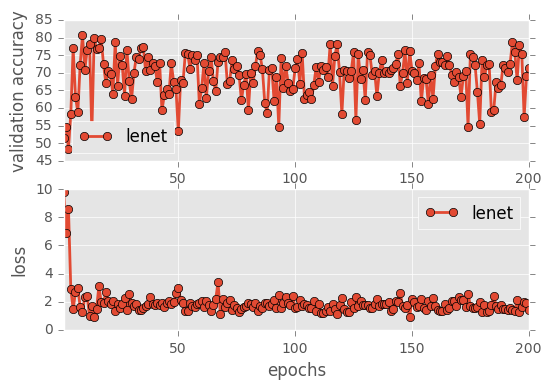

In [31]:
sess, lenet_tensor_ops, data, cfg = train_and_test(preprocess=False, epochs=200, network="lenet", use_augmented_file=False)

---
## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

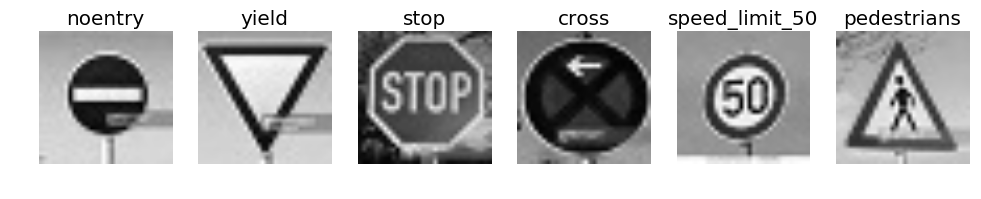

In [73]:
total_images_from_internet = data.images_from_internet.shape[0]
i = 0
plt.figure(figsize=(12, 12))
for img, filename in zip(data.images_from_internet, data.filenames_from_internet):
    plt.subplot(1, total_images_from_internet, i+1)
    img = np.reshape(img, (32, 32))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(filename.split(".")[0].split('/')[1])
    i += 1

plt.show()

# Prediction Function

In [18]:
import matplotlib.gridspec as gridspec

def predict(sess, tensor_ops, images, data, cfg, top_k=5):
    print("Predicting from Random Images: Number of Images: %s" % images.shape[0])
    cfg.IS_TRAINING = False
    pred = tf.nn.softmax(tensor_ops.logits)
    predictions = sess.run(pred, feed_dict={tensor_ops.x: images, tensor_ops.dropout_keep_prob: 1.0, tensor_ops.phase: 0})
    values, indices = tf.nn.top_k(predictions, top_k)
    values, indices = values.eval(session=sess), indices.eval(session=sess)
    print(values, indices)

    filenames = data.filenames_from_internet
    for i, img in enumerate(images):
        plt.figure(figsize = (top_k, 1.5))
        gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
        plt.subplot(gs[0])
        if img.shape[2] == 1:
            img = np.reshape(img, (img.shape[0], img.shape[1]))
        plt.imshow(img)
        plt.axis('off')
        plt.subplot(gs[1])
        plt.barh(top_k + 1 - np.arange(top_k), values[i], align='center')
        for i_label in range(top_k):
            plt.text(values[i][i_label] + .008, top_k + 1-i_label-.25, data.get_signname(indices[i][i_label]) + " --> (" + str(indices[i][i_label]) + ")")
            plt.text(values[i][i_label] / 2.0 - 0.01, top_k + 1-i_label-.25, "{:2.1f}%".format(values[i][i_label] * 100.0))
        plt.axis('off');
        plt.text(0,6.95, filenames[i].split(".")[0].split('/')[1]);
        plt.show();        
        
    plt.show()

## LeNet Prediction

Max Classified id: 43
----------------------------------------------------------------------------------------------------
Training lenet --> Use Augmented Data: False
----------------------------------------------------------------------------------------------------
conv2d_1: [None, 28, 28, 6]
conv2d_2: [None, 10, 10, 16]
Training...

EPOCH 1 ...
Validation Accuracy = 0.055

EPOCH 2 ...
Validation Accuracy = 0.058

EPOCH 3 ...
Validation Accuracy = 0.058

EPOCH 4 ...
Validation Accuracy = 0.055

EPOCH 5 ...
Validation Accuracy = 0.055

EPOCH 6 ...
Validation Accuracy = 0.058

EPOCH 7 ...
Validation Accuracy = 0.058

EPOCH 8 ...
Validation Accuracy = 0.058

EPOCH 9 ...
Validation Accuracy = 0.058

EPOCH 10 ...
Validation Accuracy = 0.058

EPOCH 11 ...
Validation Accuracy = 0.055

EPOCH 12 ...
Validation Accuracy = 0.055

EPOCH 13 ...
Validation Accuracy = 0.058

EPOCH 14 ...
Validation Accuracy = 0.055

EPOCH 15 ...
Validation Accuracy = 0.055

EPOCH 16 ...
Validation Accuracy = 0.055

/home/ssarangi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


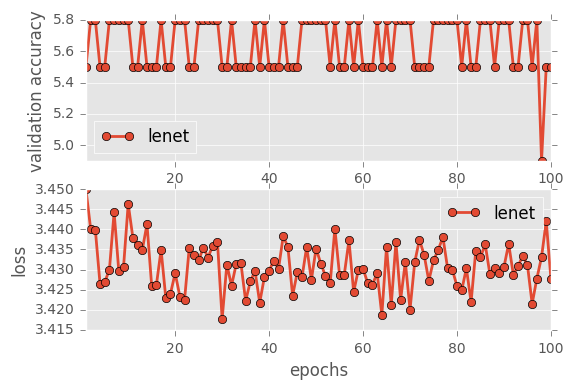

In [181]:
sess, lenet_tensor_ops, data, cfg = train_and_test(preprocess=False, epochs=100, network="lenet", use_augmented_file=False)

In [19]:
predict(sess, lenet_tensor_ops, data.images_from_internet, data, cfg, top_k=5)

NameError: name 'cfg' is not defined

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
outputFeatureMap(data.X_train[100], )

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 